<a href="https://colab.research.google.com/github/DanB1421/DATA602/blob/main/Brilliant_Problem_Set_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preamble

In [ ]:
from google.colab import drive
import numpy as np
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For convenience, the `plot_silhouette` function discussed in class is below.

In [ ]:
import matplotlib.cm as cm
def plot_silhouette(samples,
                    labels,
                    ax=None,
                    cmap='Dark2'):
  if (ax is None):
    ax = plt.gca()

  # sort samples by label, and add index
  df = (np
     .c_[samples, labels]
     .view(dtype=[("samples", float), ("labels", float)]))
  df.sort(axis=0, order=["labels", "samples"])
  df = np.c_[df.view(float), np.arange(df.shape[0])]

  # bar plot
  z = ax.barh(df[:,2], df[:,0], 1)

  #color map for plotting
  cmap = cm.get_cmap(cmap)

  #set bar colors
  maxcluster = np.max(df[:, 1])
  for ix, k in enumerate(df):
    z[ix].set_color(cmap(k[1]/maxcluster))

  #label y axis ticks
  yticks = []
  yticklabels = []

  bounds = np.r_[np.argwhere(np.diff(df[:,1], prepend=[0]) > 0).ravel(),
                 df.shape[0]].ravel()
  for ix, b in enumerate(bounds):
    low = bounds[ix - 1] if ix > 0 else 0
    high = b
    yticks.append((low + high)/2)
    yticklabels.append(df[low,1].astype(labels.dtype))

  #axis decorations
  bounds, yticks, yticklabels
  ax.set_yticks(yticks)
  ax.set_yticklabels(yticklabels)
  ax.grid()
  ax.set_ylabel("Cluster")
  ax.set_xlabel("Silhouette")
  return ax

# Problem 1

In the 602 shared drive, the file /data/cluster.txt contains a features matrix $\mathbf{X}\in\mathbb{R}^{10,000\times20}$.  (You can use `np.loadtxt` to read the file as a numpy matrix.)  This features was generated from scikit-learn's `make_blobs` function with parameters of `n_features=20` and centers uniformly distributed in $[-5, 5]$ along each axis.  The dataset was produced with at least 5 but no more than 15 clusters.  Find the number of clusters used to generate the dataset (i.e., $k$ that best clusters the data), and justify your conclusion using silhouette plots.


In [ ]:
X = np.loadtxt('/content/drive/Shareddrives/DS602-F22/Data/cluster.txt')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

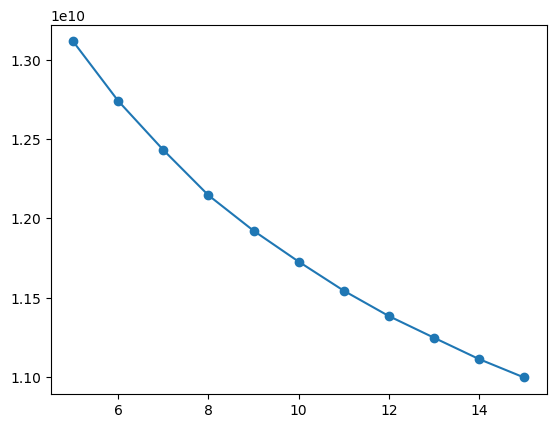

In [ ]:
import matplotlib.pyplot as plt # imports matplotlib
from sklearn.cluster import KMeans # imports KMeans
from sklearn.metrics import silhouette_samples, silhouette_score # imports silhouette samples and silhouette scores
scores = [] # creates list for scores
silscores = [] # creates list for silhouette scores
for k in range(5, 16): # creates a for loop to determine scores between 5 clusters and 15 clusters
  km = KMeans(k) # defines km as KMeans for each value
  km.fit(X) # fits km to X
  labels = km.predict(X) # labels by using km to predict X
  scores.append([k, km.inertia_]) # appends km.inertia values to scores
  silscores.append([k, silhouette_score(X, labels)]) # appends value and silhouette score from X and labels to silscores
s = np.c_[scores] # translates scores into concatenation along the second axis
plt.plot(s[:,0], s[:,1], 'o-') # plots the score values

In [ ]:
silscores # displays the silscore values

[[5, 0.5839525560184549],
 [6, 0.4685670127192312],
 [7, 0.37217817504977957],
 [8, 0.2571600066263125],
 [9, 0.1506907881541177],
 [10, 0.14885500214723632],
 [11, 0.0466787073043231],
 [12, 0.0457427311318124],
 [13, 0.04429093482338613],
 [14, 0.04394407020836004],
 [15, 0.04187038935523849]]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-2-c1decc9aae84>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-2-c1decc9aae84>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cma

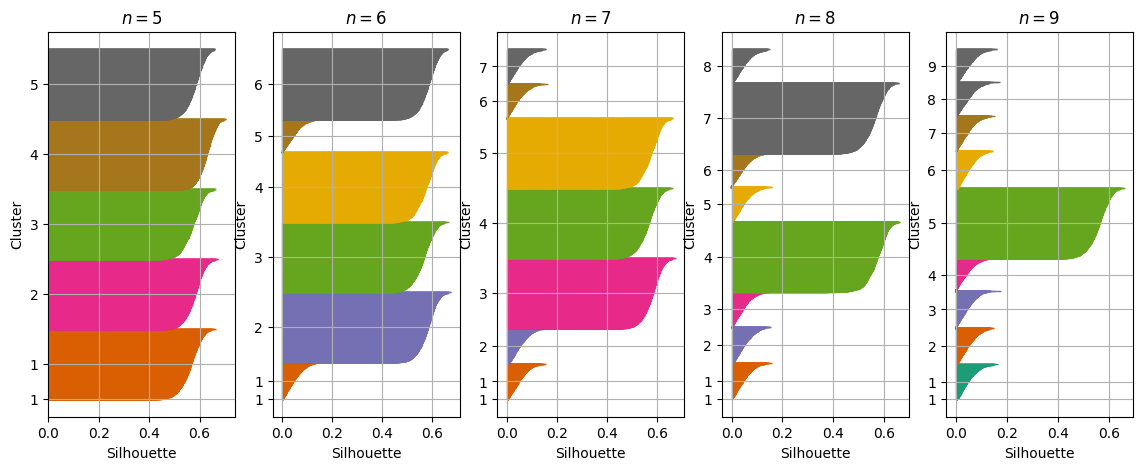

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(14,5)) # creates 5 plots
for ix, ax in enumerate(ax.ravel()):
  nclusters = ix + 5
  km = KMeans(nclusters)
  km.fit(X)
  labels = km.predict(X)
  silvals = silhouette_samples(X, labels)
  plot_silhouette(silvals, nclusters-labels, cmap='Dark2', ax=ax)
  ax.set_title(f"$n={nclusters}$")

# creates a for loop that displays silhouette plots for ks 5-9

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-2-c1decc9aae84>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-2-c1decc9aae84>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cma

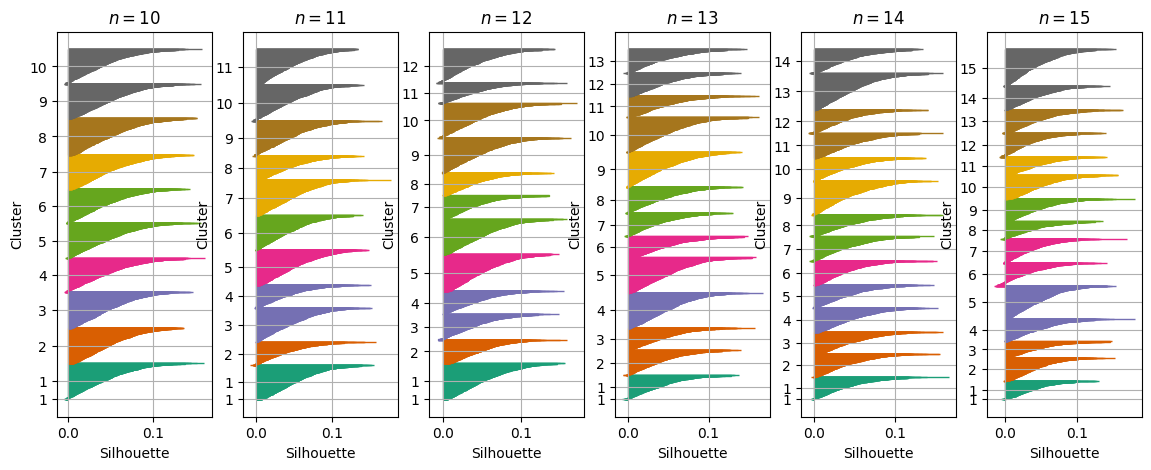

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=(14,5)) # creates 6 plots
for ix, ax in enumerate(ax.ravel()):
  nclusters = ix + 10
  km = KMeans(nclusters)
  km.fit(X)
  labels = km.predict(X)
  silvals = silhouette_samples(X, labels)
  plot_silhouette(silvals, nclusters-labels, cmap='Dark2', ax=ax)
  ax.set_title(f"$n={nclusters}$")

# creates a for loop that displays silhouette plots for ks 10-15

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1230.876096294081


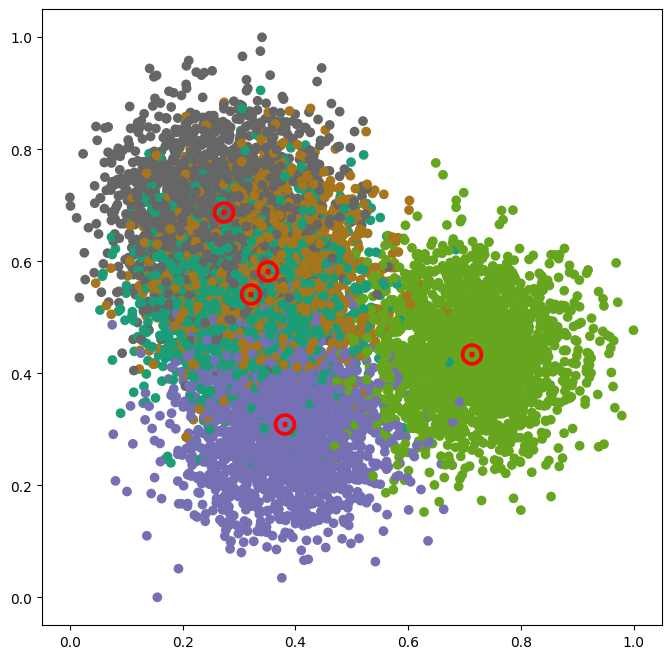

In [ ]:
_, ax = plt.subplots(figsize=(8,8))

km = KMeans(5)
labels = km.fit_predict(X)
ax.scatter(X[:,0], X[:,1], cmap='Dark2', c=labels)
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
           marker=r'$\odot$', c='red', s=300, zorder=200)

print(km.inertia_)

# above creates plot that displays clusters for k = 5

Based on both the silscores and the silhouette plots themselves, the data appears to be derived from 5 clusters. The distribution of the silhouettes in the n=5 plot are mostly even, while the same cannot be said for the others. Additionally, the silscores themselves steadily decrease from their peak value at k=5.

# Problem 2
The Fashion-MNIST dataset is a dataset of 10,000 grayscale images of size $28\times28$.  Each image depicts an article of clothing.  Load the dataset from OpenML (the dataset name is "Fashion-MNIST") and retain only the first 5,000 images.  Find an optimal number of Gaussian components based on the Akaike Information Criterion (AIC), and use the AIC scores to cluster the data using a GMM.  Visually inspect the model outcomes.  Is the clustering the model selected meaningful (e.g., are the cluster separations intuitive)?

In [ ]:
from sklearn.datasets import fetch_openml
X, _ = fetch_openml("Fashion-MNIST", return_X_y=True, as_frame=False)
# keep only the first 5,000 images
X = X[:5000,:]

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.mixture import GaussianMixture # imports GaussianMixture
import pandas as pd # imports pandas
recs = [] # creates recs list
comps = np.arange(2, 50) # creates a list of comparisons for values 2-50
for k in comps:
  gmm = GaussianMixture(n_components=k)
  gmm.fit(X)
  recs.append([k,
               gmm.aic(X),
               gmm.bic(X)
               ])

# for loop that adds AIC and BIC recs for values 2-50 to list
icdf = pd.DataFrame(recs, columns=["k", "AIC", "BIC"]) # creates dataframe from recs
icdf.set_index("k", inplace=True) # sets k as dataframe index
icdf.style.background_gradient(axis=0, cmap="Blues_r") # creates gradient for AIC and BIC values

,AIC,BIC
k,,
2,33149589.443068,37170756.296910
3,27831770.813545,33863524.352906
4,27518437.529206,35560777.754084
5,26502758.530385,36555685.440781
6,20633459.907038,32696973.502952
7,17127601.807665,31201702.089097
8,14378136.397665,30462823.364614
9,11947755.289617,30043028.942084
10,8078608.324145,28184468.662130


Text(0, 0.5, 'Information Criteria')

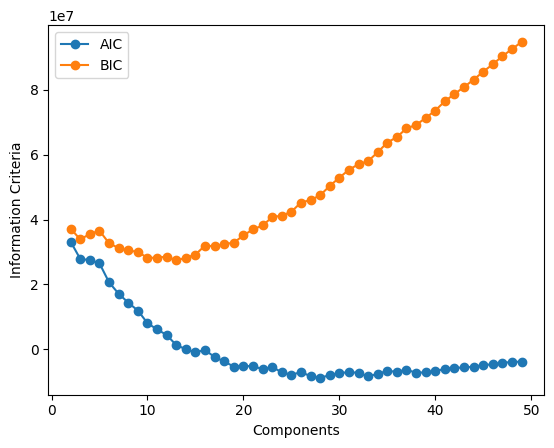

In [ ]:
plt.plot(icdf.index, icdf["AIC"], label='AIC', marker='o')
plt.plot(icdf.index, icdf["BIC"], label='BIC', marker='o')
ax = plt.gca()
ax.legend()
ax.set_xlabel("Components")
ax.set_ylabel("Information Criteria")

# creates plot that displays AIC and BIC trend

In [ ]:
from sklearn.mixture import GaussianMixture # imports GausianMixture
gmm = GaussianMixture(n_components=25) # creates Gaussian Mixture with 25 components (lowest AIC value)
y_pred = gmm.fit_predict(X) # fits gmm to X

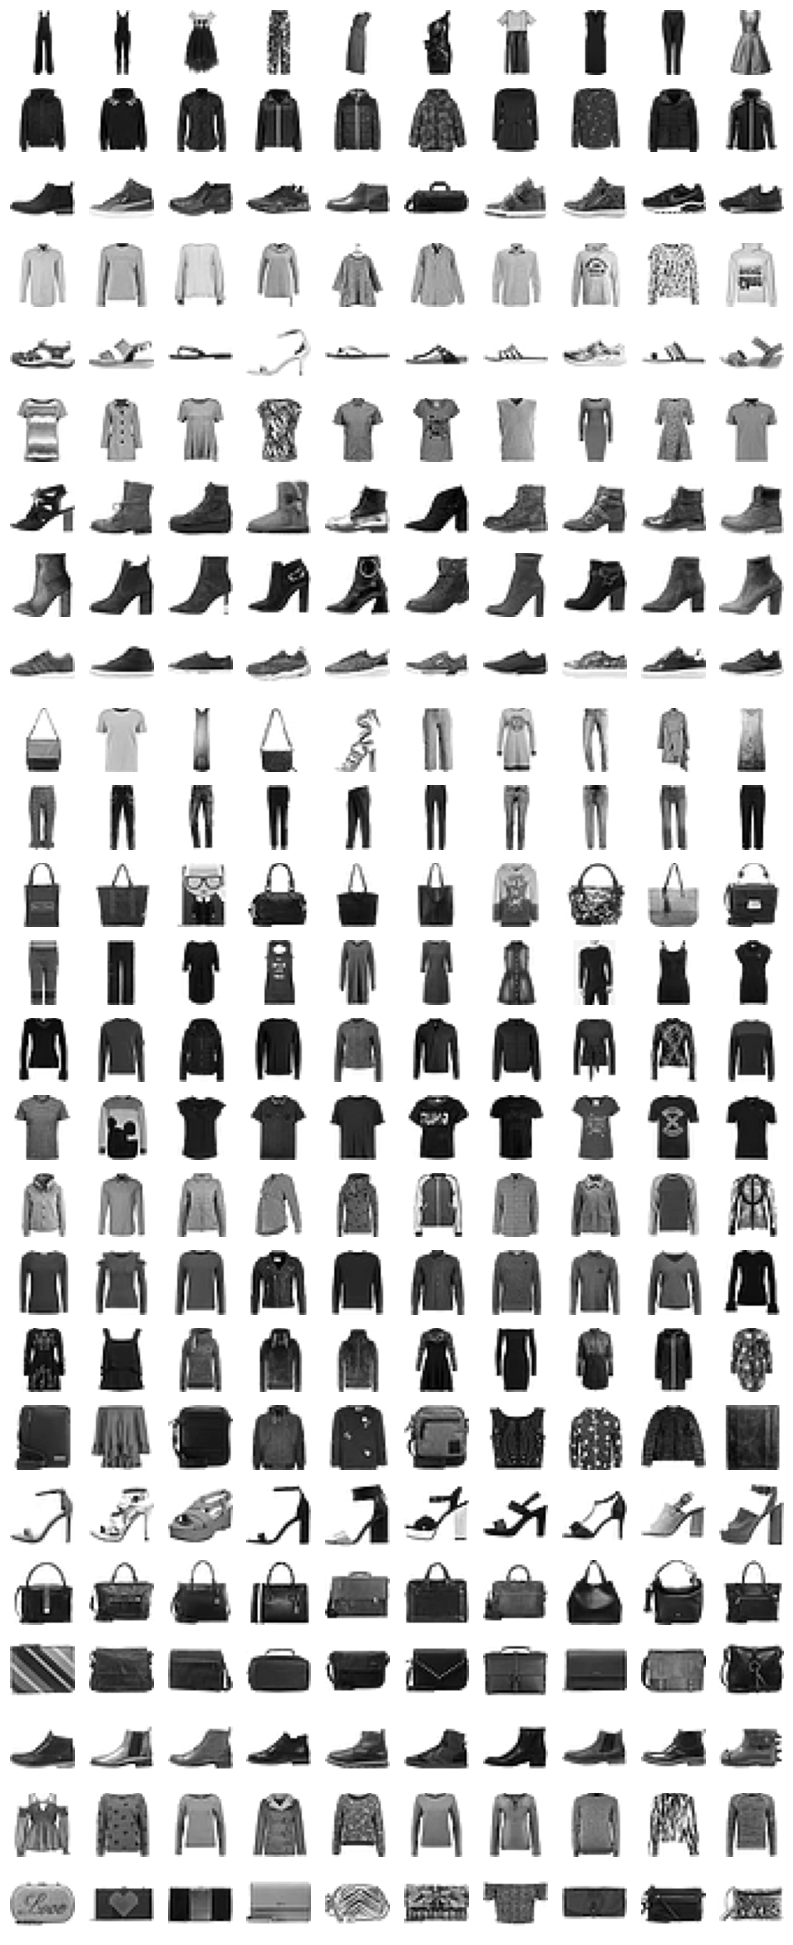

In [ ]:
clusters = np.unique(y_pred) # creates list of unique values of y_pred for clustering
fig, axs = plt.subplots(len(clusters),10, figsize=(10,len(clusters))) # creates plots from the number of determined clusters
for cix, c in enumerate(clusters):
  candidx = np.argwhere(y_pred==c).ravel()
  sampidx = np.random.choice(candidx, 10, replace=False)
  for six, s in enumerate(sampidx):
    ax = axs[cix,six]
    img = X[s].reshape(28,28)
    ax.imshow(img, cmap='gray_r')
    ax.set_axis_off()

# for loop displays the images after cluster classification

It does appear that the clustering model selected is meaningful and intuitive. The clothing types in each row appear to be categorized properly by type and by color/shading.

# Problem 3
Import the MNIST-784 dataset (handwritten numbers), and keep only observations labeled as "7".   Using an outlier detection method of your choice, identify outlier observations, i.e., observations that do not resemble other observations in the dataset.  Display a sample of 5-10 detected outlier observations.

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False) # receives mnist_784 dataset

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
filter = np.where(y=='7') # creates index filter where y label values are always 7
X = X[filter] # filters X by the above indices

In [ ]:
from sklearn.neighbors import LocalOutlierFactor # imports LocalOutlierFactor
lof = LocalOutlierFactor(20) # creates LocalOutlierFactor algorithm with 20 nearest neighbors
lp = lof.fit_predict(X) # uses algorithm to fit and predict X values

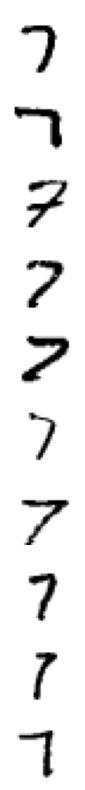

In [ ]:
fig, axs = plt.subplots(10, figsize=(1, 10)) # creates 10 displays
candidx = np.argwhere(lp==c).ravel() # finds candidates where outliers occur in lp
sampidx = np.random.choice(candidx, 10, replace=False) # chooses 10 random values from candidx
for six, s in enumerate(sampidx):
  ax = axs[six]
  img = X[s].reshape(28,28)
  ax.imshow(img, cmap='gray_r')
  ax.set_axis_off()

# runs for loop to display sampidx images